In [ ]:
import os
import numpy as np
import nibabel as nib
from PIL import Image

def normalize(volume):
    """Normalize the volume to 0-1 scale"""
    min_val = np.min(volume)
    max_val = np.max(volume)
    return (volume - min_val) / (max_val - min_val)

def generate_slices_flat_structure_tiff_and_rotate(src_dir, base_tgt_dir):
    """
    Generate 2D slices from 3D NIfTI grey matter masks, rotate them by 90 degrees,
    and place them into train, test, or val directories based on the patient ID.
    The output filenames are formatted as 'KCLXXXX_Y.tiff', maintaining the 0-1 normalization.
    """
    os.makedirs(base_tgt_dir, exist_ok=True)
    
    for filename in os.listdir(src_dir):
        if filename.endswith(".nii.gz"):
            id = filename.split("_")[0].replace("sub-", "")
            id_num = int(id)
            filepath = os.path.join(src_dir, filename)
            
            if 1 <= id_num <= 20:
                sub_dir = "train"
            elif 21 <= id_num <= 30:
                sub_dir = "test"
            elif 31 <= id_num <= 37:
                sub_dir = "val"
            else:
                continue

            tgt_dir = os.path.join(base_tgt_dir, sub_dir)
            os.makedirs(tgt_dir, exist_ok=True)

            nifti = nib.load(filepath)
            volume_norm = normalize(nifti.get_fdata())
            
            for i in range(volume_norm.shape[-1]):
                slice = volume_norm[:, :, i]
                slice_image = Image.fromarray(slice.astype(np.float32))
                rotated_slice = slice_image.rotate(90, expand=True)  # Rotate by 90 degrees
                
                slice_filename = f"KCL{id}_{i+1}.tiff"
                rotated_slice.save(os.path.join(tgt_dir, slice_filename), format='TIFF')
                print(f"Saved: {os.path.join(tgt_dir, slice_filename)}")

if __name__ == "__main__":
    src_dir = "./GM"  # Your source directory for NIfTI files
    base_tgt_dir = "./data/processed/sorted_masks"  # Your base target directory for TIFF files
    generate_slices_flat_structure_tiff_and_rotate(src_dir, base_tgt_dir)


In [3]:
import os
import numpy as np
from PIL import Image

def ensure_scale_to_1(image):
    """Ensure the image is in the 0-1 scale."""
    if np.max(image) > 1:
        image = image / 255.0
    return image

def process_directory_flat_structure(src_base, tgt_base):
    """
    Process all NumPy files in the source base directory, ensuring they are in the 0-1 range,
    and save them in the corresponding train, test, or val directories with filenames formatted
    as 'KCLXXXX_Y.tiff', where Y has no leading zeros.
    """
    if not os.path.exists(tgt_base):
        os.makedirs(tgt_base, exist_ok=True)

    for root, dirs, files in os.walk(src_base):
        base_folder_name = os.path.basename(root)
        # Skip processing if the directory does not match the expected patient folder format
        if not base_folder_name.startswith('KCL_'):
            continue

        patient_number = base_folder_name.replace('KCL_', '')
        try:
            patient_number_int = int(patient_number)
        except ValueError:
            continue  # Skip directories that don't have an integer after 'KCL_'

        # Determine the target subdirectory based on patient number
        if 1 <= patient_number_int <= 20:
            sub_dir = 'train'
        elif 21 <= patient_number_int <= 30:
            sub_dir = 'test'
        elif 31 <= patient_number_int <= 37:
            sub_dir = 'val'
        else:
            continue  # Skip files outside the specified ranges

        target_dir = os.path.join(tgt_base, sub_dir)
        os.makedirs(target_dir, exist_ok=True)

        for filename in files:
            if filename.endswith('.npy'):
                img_data = np.load(os.path.join(root, filename))
                scaled_img_1 = ensure_scale_to_1(img_data)
                slice_number = int(filename.replace('IMG', '').split('.')[0])
                output_filename = f"KCL{patient_number}_{slice_number}.tiff"
                img_to_save = Image.fromarray(scaled_img_1.astype(np.float32))
                img_to_save.save(os.path.join(target_dir, output_filename), format='TIFF')
                print(f"Saved: {os.path.join(target_dir, output_filename)}")

if __name__ == "__main__":
    src_base = 'data/processed/brain_extracted'
    tgt_base = 'data/processed/sorted_imgs'
    process_directory_flat_structure(src_base, tgt_base)


Saved: data/processed/sorted_imgs/val/KCL0034_57.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_225.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_94.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_154.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_76.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_82.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_7.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_174.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_147.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_65.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_208.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_199.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_161.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_84.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_2.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_47.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_215.tiff
Saved: data/processed/sorted_imgs/val/KCL0034_178.tiff
Saved: data/processed

In [ ]:
import os
import numpy as np
from PIL import Image

def ensure_scale_to_1(image):
    """Ensure the image is in the 0-1 scale."""
    if np.max(image) > 1:
        image = image / 255.0
    return image

def process_directory_flat_structure(src_base, tgt_base):
    """
    Process all NumPy files in the source base directory, ensuring they are in the 0-1 range,
    and save them in the corresponding train, test, or val directories with filenames formatted
    as 'KCLXXXX_Y.tiff', where Y has no leading zeros.
    """
    if not os.path.exists(tgt_base):
        os.makedirs(tgt_base, exist_ok=True)

    for root, dirs, files in os.walk(src_base):
        base_folder_name = os.path.basename(root)
        # Skip processing if the directory does not match the expected patient folder format
        if not base_folder_name.startswith('KCL_'):
            continue

        patient_number = base_folder_name.replace('KCL_', '')
        try:
            patient_number_int = int(patient_number)
        except ValueError:
            continue  # Skip directories that don't have an integer after 'KCL_'

        # Determine the target subdirectory based on patient number
        if 1 <= patient_number_int <= 20:
            sub_dir = 'train'
        elif 21 <= patient_number_int <= 30:
            sub_dir = 'test'
        elif 31 <= patient_number_int <= 37:
            sub_dir = 'val'
        else:
            continue  # Skip files outside the specified ranges

        target_dir = os.path.join(tgt_base, sub_dir)
        os.makedirs(target_dir, exist_ok=True)

        for filename in files:
            if filename.endswith('.npy'):
                img_data = np.load(os.path.join(root, filename))
                scaled_img_1 = ensure_scale_to_1(img_data)
                slice_number = int(filename.replace('IMG', '').split('.')[0])
                output_filename = f"KCL{patient_number}_{slice_number}.tiff"
                img_to_save = Image.fromarray(scaled_img_1.astype(np.float32))
                img_to_save.save(os.path.join(target_dir, output_filename), format='TIFF')
                print(f"Saved: {os.path.join(target_dir, output_filename)}")

if __name__ == "__main__":
    src_base = 'data/processed/windowed'
    tgt_base = 'data/processed/sorted_imgs_no_brain_extraction'
    process_directory_flat_structure(src_base, tgt_base)


In [ ]:
import shutil
from pathlib import Path
running_task = 'gm_alt'  # Adjust this based on the specific mask you are working with

SOURCE_DIR = './data/processed/'

dir_img = Path(SOURCE_DIR + 'sliced_brain_extracted/')  # CT images directory
dir_mask = Path(SOURCE_DIR + 'processed_masks/' + running_task)  # Mask directory

# Assuming you will create directories for train/test/val during the dataset preparation step
dir_img_train = dir_img / 'train'
dir_mask_train = dir_mask / 'train'

dir_img_val = dir_img / 'val'
dir_mask_val = dir_mask / 'val'

dir_img_test = dir_img / 'test'
dir_mask_test = dir_mask / 'test'


In [ ]:
# shift output to train test val
def split_data(src_dir, base_dir):
    """
    Splits data into train, val, and test sets based on ID ranges and moves them to the respective directories.
    """
    for folder_name in os.listdir(src_dir):
        folder_id = get_id_from_name(folder_name)
        if folder_id is None:
            continue
        
        # Determine the destination sub-directory (train, val, or test)
        if 1 <= folder_id <= 20:
            split_dir = "train"
        elif 21 <= folder_id <= 30:
            split_dir = "test"
        elif 31 <= folder_id <= 37:
            split_dir = "val"
        else:
            continue  # Skip if outside range
        
        src_path = os.path.join(src_dir, folder_name)
        dest_path = os.path.join(base_dir, split_dir, folder_name)
        
        # Ensure the target directory exists
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)

        # Move the source folder to the destination
        if os.path.exists(dest_path):
            shutil.rmtree(dest_path)  # Remove existing directory to avoid duplication
        shutil.move(src_path, dest_path)  # Use shutil.move to relocate folders
        print(f"Moved {folder_name} into {split_dir}")

if __name__ == "__main__":
    base_dir = "./data"  # Point to the top-level data directory
    processed_dir = os.path.join(base_dir, "processed")
    
    # Define source directories within 'processed'
    targets = ["sliced_brain_extracted", "processed_masks"]
    
    for target in targets:
        src_dir = os.path.join(processed_dir, target)
        split_data(src_dir, base_dir)  # Pass the correct base directory


In [ ]:
import numpy as np

# Load the .npy file
file_path = "data/processed/processed_masks/sub-0002_space-MNI_T1w_brain_pve_1/sub-0002_space-MNI_T1w_brain_pve_1_slice_1.npy"
img_data = np.load(file_path)

# Print the shape of the loaded image data
img_data.shape

In [ ]:
import imageio
import numpy as np

# Load the .tiff file using imageio
file_path = "../../../../data/wang1448/FYP_WANG1448/TransUnet/oasis_freesurfer/labels_norm/ct_norm/OAS31168_99.tiff"
img_data = imageio.imread(file_path)

# Print the shape of the loaded image data
print(img_data.shape)


In [ ]:
import imageio
import numpy as np

# Load the .tiff file using imageio
file_path = "data/processed/sorted_imgs_no_brain_extraction/train/KCL0001_1.tiff"
img_data = imageio.imread(file_path)

# Print the shape of the loaded image data
print(img_data.shape)


In [ ]:
"""
"data/oasis/ct_norm_resized",
    "data/oasis/gm_resized
"""

import imageio
import numpy as np

# Load the .tiff file using imageio
file_path = "data/oasis/ct_norm_resized/OAS30001_51.tiff"
img_data = imageio.imread(file_path)

# Print the shape of the loaded image data
print(img_data.shape)

# Check the maximum and minimum values
max_value = np.max(img_data)
min_value = np.min(img_data)

if max_value > 1:
    print("Image values are in the range 0-255.")
else:
    print("Image values are in the range 0-1.")


In [3]:
import os
import imageio.v2 as imageio  # Use ImageIO v2 explicitly
from PIL import Image
import numpy as np
from collections import defaultdict

def normalize_image(img_array):
    """
    Normalize image array to [0, 1] range, regardless of the input range.
    """
    img_min = img_array.min()
    img_max = img_array.max()
    # Avoid division by zero if the image is constant
    if img_max == img_min:
        return np.zeros(img_array.shape, dtype=np.float32)
    return (img_array - img_min) / (img_max - img_min)

def resize_rotate_convert_save_image(src_filepath, dst_dir, filename, target_shape=(243, 207), rotation_angle=90):
    """
    Resize, rotate, normalize, and save an image at src_filepath to dst_dir with the given filename.
    Ensures that saved TIFF files have pixel values normalized to [0, 1].
    """
    img_array = imageio.imread(src_filepath).astype(np.float32)
    normalized_img_array = normalize_image(img_array)

    # Convert to PIL Image for processing
    img = Image.fromarray((normalized_img_array * 255).clip(0, 255).astype(np.uint8))
    resized_img = img.resize(target_shape, Image.LANCZOS)
    rotated_img = resized_img.rotate(rotation_angle, expand=True)

    # Convert back to numpy array and ensure it's float32
    final_img_array = np.array(rotated_img).astype(np.float32) / 255.0

    # Ensure the filename has a .tiff extension
    dst_filepath = os.path.join(dst_dir, filename.replace('.png', '.tiff'))
    
    # Use imageio to save the image, ensuring values are within [0, 1]
    imageio.imwrite(dst_filepath, final_img_array, format='TIFF')
    print(f"Processed and saved: {dst_filepath}")

def process_images_groupwise(src_dir_ct, src_dir_gm, dst_dir_ct, dst_dir_gm, target_shape=(243, 207), rotation_angle=90, max_files=4520):
    if not os.path.exists(dst_dir_ct):
        os.makedirs(dst_dir_ct, exist_ok=True)
    if not os.path.exists(dst_dir_gm):
        os.makedirs(dst_dir_gm, exist_ok=True)

    ct_files = [f for f in os.listdir(src_dir_ct) if f.endswith('.tiff') or f.endswith('.png')]
    gm_files = [f for f in os.listdir(src_dir_gm) if f.endswith('.tiff') or f.endswith('.png')]
    
    # Extract identifiers (XXXX) and group by them
    ct_groups = defaultdict(list)
    for file in ct_files:
        identifier = file.split('_')[0]
        ct_groups[identifier].append(file)
    
    gm_groups = defaultdict(list)
    for file in gm_files:
        identifier = file.split('_')[0]
        gm_groups[identifier].append(file)

    common_identifiers = set(ct_groups.keys()).intersection(gm_groups.keys())

    processed_files = 0
    for identifier in common_identifiers:
        if processed_files >= max_files:
            break

        ct_filenames = sorted(ct_groups[identifier], key=lambda x: int(x.split('_')[-1].split('.')[0]))
        gm_filenames = sorted(gm_groups[identifier], key=lambda x: int(x.split('_')[-1].split('.')[0]))
        
        for ct_file, gm_file in zip(ct_filenames, gm_filenames):
            if processed_files >= max_files:
                break

            # Process and save CT image
            src_filepath_ct = os.path.join(src_dir_ct, ct_file)
            resize_rotate_convert_save_image(src_filepath_ct, dst_dir_ct, ct_file, target_shape, rotation_angle)

            # Process and save GM image
            src_filepath_gm = os.path.join(src_dir_gm, gm_file)
            resize_rotate_convert_save_image(src_filepath_gm, dst_dir_gm, gm_file, target_shape, rotation_angle)

            processed_files += 1

# Adjust paths accordingly
src_dir_ct = "../../../../data/wang1448/FYP_WANG1448/TransUnet/oasis_freesurfer/labels_norm_test/ct_norm"
src_dir_gm = "../../../../data/wang1448/FYP_WANG1448/TransUnet/oasis_freesurfer/labels_norm_test/gm"
dst_dir_ct = "data/oasis/ct_norm_test_resized"
dst_dir_gm = "data/oasis/gm_test_resized"

process_images_groupwise(src_dir_ct, src_dir_gm, dst_dir_ct, dst_dir_gm, max_files=1582)


Processed and saved: data/oasis/ct_norm_test_resized/OAS31125_39.tiff
Processed and saved: data/oasis/gm_test_resized/OAS31125_39.tiff
Processed and saved: data/oasis/ct_norm_test_resized/OAS31125_40.tiff
Processed and saved: data/oasis/gm_test_resized/OAS31125_40.tiff
Processed and saved: data/oasis/ct_norm_test_resized/OAS31125_41.tiff
Processed and saved: data/oasis/gm_test_resized/OAS31125_41.tiff
Processed and saved: data/oasis/ct_norm_test_resized/OAS31125_42.tiff
Processed and saved: data/oasis/gm_test_resized/OAS31125_42.tiff
Processed and saved: data/oasis/ct_norm_test_resized/OAS31125_43.tiff
Processed and saved: data/oasis/gm_test_resized/OAS31125_43.tiff
Processed and saved: data/oasis/ct_norm_test_resized/OAS31125_44.tiff
Processed and saved: data/oasis/gm_test_resized/OAS31125_44.tiff
Processed and saved: data/oasis/ct_norm_test_resized/OAS31125_45.tiff
Processed and saved: data/oasis/gm_test_resized/OAS31125_45.tiff
Processed and saved: data/oasis/ct_norm_test_resized/OA

In [4]:
import os
import imageio.v2 as imageio  # Use ImageIO v2 explicitly
from PIL import Image
import numpy as np
from collections import defaultdict

def normalize_image(img_array):
    """
    Normalize image array to [0, 1] range, regardless of the input range.
    """
    img_min = img_array.min()
    img_max = img_array.max()
    # Avoid division by zero if the image is constant
    if img_max == img_min:
        return np.zeros(img_array.shape, dtype=np.float32)
    return (img_array - img_min) / (img_max - img_min)

def resize_rotate_convert_save_image(src_filepath, dst_dir, filename, target_shape=(243, 207), rotation_angle=90):
    """
    Resize, rotate, normalize, and save an image at src_filepath to dst_dir with the given filename.
    Ensures that saved TIFF files have pixel values normalized to [0, 1].
    """
    img_array = imageio.imread(src_filepath).astype(np.float32)
    normalized_img_array = normalize_image(img_array)

    # Convert to PIL Image for processing
    img = Image.fromarray((normalized_img_array * 255).clip(0, 255).astype(np.uint8))
    resized_img = img.resize(target_shape, Image.LANCZOS)
    rotated_img = resized_img.rotate(rotation_angle, expand=True)

    # Convert back to numpy array and ensure it's float32
    final_img_array = np.array(rotated_img).astype(np.float32) / 255.0

    # Ensure the filename has a .tiff extension
    dst_filepath = os.path.join(dst_dir, filename.replace('.png', '.tiff'))
    
    # Use imageio to save the image, ensuring values are within [0, 1]
    imageio.imwrite(dst_filepath, final_img_array, format='TIFF')
    print(f"Processed and saved: {dst_filepath}")

def process_images_groupwise(src_dir_ct, src_dir_gm, dst_dir_ct, dst_dir_gm, target_shape=(243, 207), rotation_angle=90, max_files=4520):
    if not os.path.exists(dst_dir_ct):
        os.makedirs(dst_dir_ct, exist_ok=True)
    if not os.path.exists(dst_dir_gm):
        os.makedirs(dst_dir_gm, exist_ok=True)

    ct_files = [f for f in os.listdir(src_dir_ct) if f.endswith('.tiff') or f.endswith('.png')]
    gm_files = [f for f in os.listdir(src_dir_gm) if f.endswith('.tiff') or f.endswith('.png')]
    
    # Extract identifiers (XXXX) and group by them
    ct_groups = defaultdict(list)
    for file in ct_files:
        identifier = file.split('_')[0]
        ct_groups[identifier].append(file)
    
    gm_groups = defaultdict(list)
    for file in gm_files:
        identifier = file.split('_')[0]
        gm_groups[identifier].append(file)

    common_identifiers = set(ct_groups.keys()).intersection(gm_groups.keys())

    processed_files = 0
    for identifier in common_identifiers:
        if processed_files >= max_files:
            break

        ct_filenames = sorted(ct_groups[identifier], key=lambda x: int(x.split('_')[-1].split('.')[0]))
        gm_filenames = sorted(gm_groups[identifier], key=lambda x: int(x.split('_')[-1].split('.')[0]))
        
        for ct_file, gm_file in zip(ct_filenames, gm_filenames):
            if processed_files >= max_files:
                break

            # Process and save CT image
            src_filepath_ct = os.path.join(src_dir_ct, ct_file)
            resize_rotate_convert_save_image(src_filepath_ct, dst_dir_ct, ct_file, target_shape, rotation_angle)

            # Process and save GM image
            src_filepath_gm = os.path.join(src_dir_gm, gm_file)
            resize_rotate_convert_save_image(src_filepath_gm, dst_dir_gm, gm_file, target_shape, rotation_angle)

            processed_files += 1

# Adjust paths accordingly
src_dir_ct = "../../../../data/wang1448/FYP_WANG1448/TransUnet/oasis_freesurfer/labels_norm/ct_norm"
src_dir_gm = "../../../../data/wang1448/FYP_WANG1448/TransUnet/oasis_freesurfer/labels_norm/gm"
dst_dir_ct = "data/oasis/ct_norm_resized"
dst_dir_gm = "data/oasis/gm_resized"

process_images_groupwise(src_dir_ct, src_dir_gm, dst_dir_ct, dst_dir_gm, max_files=4520)


Processed and saved: data/oasis/ct_norm_resized/OAS31146_41.tiff
Processed and saved: data/oasis/gm_resized/OAS31146_41.tiff
Processed and saved: data/oasis/ct_norm_resized/OAS31146_42.tiff
Processed and saved: data/oasis/gm_resized/OAS31146_42.tiff
Processed and saved: data/oasis/ct_norm_resized/OAS31146_43.tiff
Processed and saved: data/oasis/gm_resized/OAS31146_43.tiff
Processed and saved: data/oasis/ct_norm_resized/OAS31146_44.tiff
Processed and saved: data/oasis/gm_resized/OAS31146_44.tiff
Processed and saved: data/oasis/ct_norm_resized/OAS31146_45.tiff
Processed and saved: data/oasis/gm_resized/OAS31146_45.tiff
Processed and saved: data/oasis/ct_norm_resized/OAS31146_46.tiff
Processed and saved: data/oasis/gm_resized/OAS31146_46.tiff
Processed and saved: data/oasis/ct_norm_resized/OAS31146_47.tiff
Processed and saved: data/oasis/gm_resized/OAS31146_47.tiff
Processed and saved: data/oasis/ct_norm_resized/OAS31146_48.tiff
Processed and saved: data/oasis/gm_resized/OAS31146_48.tiff


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Assuming the file is uploaded to the environment and accessible at the specified path
file_path = 'data/processed/sorted_masks/train/KCL0001_1.tiff'

# Open and display the image
img = Image.open(file_path)
plt.imshow(img, cmap='gray')
plt.axis('off')  # Hide axis labels and ticks
plt.show()


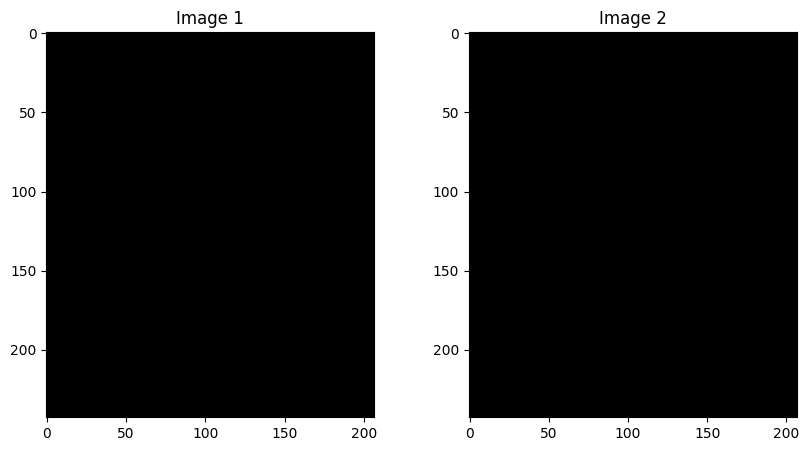

Image 1 shape: (207, 243)
Image 2 shape: (207, 243)
Image 1 stats: mean=0.10725144296884537, std=0.21952205896377563
Image 2 stats: mean=0.08051024377346039, std=0.10949119925498962
Metadata for Image 1: {'compression': 'raw', 'resolution': (1.0, 1.0)}
Metadata for Image 2: {'compression': 'raw', 'dpi': (1, 1), 'resolution': (1, 1)}
Image 1 data type: float32
Image 2 data type: float32


In [2]:
#comapring 2 tiffs
from PIL import Image
import matplotlib.pyplot as plt

img_path1 = 'data/oasis/ct_norm_resized/OAS30032_100.tiff'
img_path2 = 'data/processed/sorted_imgs/train/KCL0001_150.tiff'

img1 = Image.open(img_path1)
img2 = Image.open(img_path2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Image 1')
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Image 2')
plt.show()
print(f"Image 1 shape: {img1.size}")  # PIL uses width, height
print(f"Image 2 shape: {img2.size}")
import numpy as np

img1_array = np.array(img1)
img2_array = np.array(img2)

print(f"Image 1 stats: mean={np.mean(img1_array)}, std={np.std(img1_array)}")
print(f"Image 2 stats: mean={np.mean(img2_array)}, std={np.std(img2_array)}")
metadata1 = img1.info
metadata2 = img2.info

print("Metadata for Image 1:", metadata1)
print("Metadata for Image 2:", metadata2)

print(f"Image 1 data type: {img1_array.dtype}")
print(f"Image 2 data type: {img2_array.dtype}")



In [1]:
import os
import torchio as tio
from PIL import Image
import numpy as np

def save_transformed_images(source_dir, target_dir, transforms):
    """
    Apply transformations to images in source_dir and save them to target_dir.
    """
    # Make sure the target directory exists
    os.makedirs(target_dir, exist_ok=True)

    for filename in os.listdir(source_dir):
        if filename.endswith('.tiff') or filename.endswith('.png'):
            # Load the image
            filepath = os.path.join(source_dir, filename)
            image = Image.open(filepath)
            image_array = np.array(image)

            # Create a TorchIO Subject
            subject = tio.Subject(
                image=tio.ScalarImage(tensor=image_array[None],),  # Adding a channel dimension
            )

            # Apply transformations
            transformed_subject = transforms(subject)
            transformed_image_array = transformed_subject['image'][tio.DATA].squeeze()  # Remove channel dimension

            # Convert back to PIL Image and save
            transformed_image = Image.fromarray(transformed_image_array.astype(np.uint8))
            transformed_image.save(os.path.join(target_dir, filename))

# Define the transformations
transforms = tio.Compose([
    tio.RandomAffine(scales=(0.9, 1.1), degrees=10),
    tio.RandomBlur(std=(0, 1)),
    tio.RandomNoise(mean=0, std=(0, 0.25)),
])

source_dir = 'data/processed/sorted_imgs/train'
target_dir = 'data/new_data/train'

# Apply and save the transformed images
save_transformed_images(source_dir, target_dir, transforms)


/home/r200025/my_dvc_project/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ValueError: Input tensor must be 4D, but it is 3D

In [1]:
import pydicom

# Path to your DICOM file
dicom_file_path = 'data/raw/KCL_0001/IMG0001.dcm'

# Load the DICOM file
ds = pydicom.dcmread(dicom_file_path)

# ds now contains the DICOM file data. You can access the file's metadata attributes like so:
print("Patient ID:", ds.PatientID)
print("Study Date:", ds.StudyDate)

# If you want to see all the metadata information, you can loop through the dataset:
for tag in ds:
    try:
        tag_name = tag.name
        value = tag.value
        print(f"{tag_name}: {value}")
    except Exception as e:
        print(f"Could not read tag {tag}: {e}")

# Note: Some DICOM attributes might be missing in some files, so it's a good idea to use try-except blocks when accessing attributes.


Patient ID: KCL_0001
Study Date: 20221031
Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL']
SOP Class UID: 1.2.840.10008.5.1.4.1.1.2
SOP Instance UID: 1.2.826.0.1.3680043.2.1125.1.70814745532084765671254352391350220
Study Date: 20221031
Series Date: 20221031
Content Date: 20221031
Study Time: 150345
Series Time: 150345
Content Time: 150345
Accession Number: 
Modality: CT
Manufacturer: Unknown manufacturer
Referring Physician's Name: 
Series Description: No series description
Manufacturer's Model Name: Unknown model
Patient's Name: Anonymous
Patient ID: KCL_0001
Patient's Birth Date: 
Patient's Sex: 
Slice Thickness: 1
Patient Position: HFS
Study Instance UID: 1.2.826.0.1.3680043.8.498.25754384278760440538062430652640156956
Series Instance UID: 1.2.826.0.1.3680043.8.498.78560459250573490907987128511158316093
Study ID: KCL_0001
Series Number: 1
Instance Number: 1
Image Position (Patient): [-108, 132, -110]
Image Orientation (Patient): [1, 0, 0, 0, -1, 0]
Frame of Reference UID: 1.2.826.0.1.36